### Dooh AR Senior D - AI Team - Barnatt Wu and Johnathan Vu
#### The following notebook is used to experiment with the yolov7-tiny model to make it compatible with our data and Snap's Lens Studio

Download data
Some links:
https://docs.ultralytics.com/guides/hyperparameter-tuning/


In [ ]:
import urllib.request, os

# download the model's weights 
# NOTE: the model is not compatible with the ultralytics library

os.makedirs("./models/yolov7_tiny/weights", exist_ok=True)
url = "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt"
save_path = "./models/yolov7_tiny/weights/yolov7-tiny.pt"

urllib.request.urlretrieve(url, save_path)
print("Downloaded:", save_path)

In [ ]:
from ultralytics import YOLO

# import and intialize yolo model weights (.pt)
# model = YOLO("yolov8n.pt")
model = YOLO("./models/yolov8/yolov8n.pt")


# fine-tune model on training data
# TO-DO: Download and set up datasets, write yaml file, and train the model

# test, evaluate, etc.

In [ ]:
# exmaple usage of the model
from PIL import Image
import matplotlib.pyplot as plt

# Load the pretrained model

# Run inference on an image
results = model("test_images/test_wtc.JPG", imgsz=640)

# Show results inline
for r in results:
    im_array = r.plot()  # render detections
    im = Image.fromarray(im_array)
    plt.imshow(im)
    plt.axis("off")
    plt.show()

url = "https://ultralytics.com/images/zidane.jpg"
results = model(url, imgsz=640)

for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array)
    plt.imshow(im)
    plt.axis("off")
    plt.show()

### Fine Tuning YOLO on WTC dataset

In [57]:
from dotenv import load_dotenv
from roboflow import Roboflow
import os

load_dotenv()

roboflow_api_key = os.getenv("ROBOFLOW_API_KEY")

rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace().project("dooh-ar-senior-d-ud86j")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to DOOH-AR-Senior-D-2 in yolov8:: 100%|██████████| 2116/2116 [00:03<00:00, 586.07it/s]


In [11]:
# Fine-tune YOLOv8 model on your WTC dataset
from ultralytics import YOLO
import os

project_root = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()

data_yaml_path = os.path.join(project_root, "DOOH-AR-Senior-D-2", "data.yaml")

# Load pre-trained model
model = YOLO("yolov8n-seg.pt")


# Train the model on your dataset
results = model.train(
    data=data_yaml_path,
    epochs=25,
    batch=16,
    lr0=0.01,
    exist_ok=True,
    plots=True,
    val=True,
)

print("Training completed!")
print(f"Results saved to: {results.save_dir}")


New https://pypi.org/project/ultralytics/8.3.214 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.77  Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=c:\Users\barna\Downloads\Dooh AR Senior D\dooh_ai\DOOH-AR-Senior-D-2\data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos

train: Scanning C:\Users\barna\Downloads\Dooh AR Senior D\dooh_ai\DOOH-AR-Senior-D-2\train\labels.cache... 972 images, 5 backgrounds, 0 corrupt: 100%|██████████| 972/972 [00:00<?, ?it/s]
val: Scanning C:\Users\barna\Downloads\Dooh AR Senior D\dooh_ai\DOOH-AR-Senior-D-2\valid\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25       2.7G      1.475      2.642      2.715      1.289         22        640: 100%|██████████| 61/61 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         40         40    0.00333          1      0.705      0.424    0.00333          1      0.705      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.63G      1.329      1.715      1.617      1.183         22        640: 100%|██████████| 61/61 [00:47<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all         40         40       0.97      0.799      0.888      0.598       0.97      0.799      0.895      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25       2.7G      1.286      1.639      1.343      1.185         17        640: 100%|██████████| 61/61 [01:03<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         40         40      0.847      0.968      0.969      0.706      0.847      0.968      0.969      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.69G      1.255      1.626      1.134      1.167         15        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         40         40      0.967       0.95      0.967      0.532      0.967       0.95      0.967       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25       2.7G      1.305      1.613      1.039      1.175         25        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         40         40      0.857          1      0.968      0.642      0.857          1      0.968      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.71G      1.206      1.604     0.9112      1.151         21        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         40         40          1      0.995      0.995       0.63          1      0.995      0.995       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.68G      1.142      1.592     0.8284      1.106         15        640: 100%|██████████| 61/61 [01:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         40         40      0.947      0.975      0.986      0.716      0.947      0.975      0.986      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.68G      1.145      1.584     0.8303      1.116         19        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         40         40      0.968          1      0.991      0.575      0.968          1      0.991      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.67G      1.117      1.452     0.7747      1.099         15        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         40         40      0.922          1      0.991        0.8      0.922          1      0.991      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.65G      1.095       1.44     0.7405      1.093         19        640: 100%|██████████| 61/61 [01:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         40         40      0.996          1      0.995      0.795      0.996          1      0.995      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.68G       1.08      1.477      0.726      1.104         16        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         40         40          1      0.997      0.995      0.797      0.995      0.975      0.993      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.63G      1.062      1.399     0.7142      1.082         24        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         40         40      0.998          1      0.995      0.788      0.998          1      0.995       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.64G      1.017      1.385     0.6598      1.059         18        640: 100%|██████████| 61/61 [01:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         40         40      0.996          1      0.995      0.773      0.996          1      0.995      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.69G      1.017      1.321     0.6452      1.062         21        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         40         40      0.996          1      0.995      0.755      0.996          1      0.995      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.67G     0.9673      1.305     0.6147      1.042         26        640: 100%|██████████| 61/61 [01:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         40         40      0.997          1      0.995      0.821      0.997          1      0.995      0.756


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.62G     0.9056      1.219     0.5515      1.052         12        640: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         40         40      0.997          1      0.995      0.796      0.997          1      0.995      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.68G     0.8976      1.212     0.5318      1.031         10        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         40         40      0.998          1      0.995      0.781      0.998          1      0.995      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.62G     0.8745      1.163     0.5139      1.045         12        640: 100%|██████████| 61/61 [00:58<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         40         40      0.998          1      0.995      0.812      0.998          1      0.995      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.62G     0.8704      1.163     0.5016      1.042         12        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         40         40      0.995          1      0.995       0.81      0.995          1      0.995       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.62G     0.8498      1.128     0.4763      1.023         12        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         40         40      0.988          1      0.995      0.822      0.988          1      0.995      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.68G     0.8297      1.082     0.4631      1.009         10        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         40         40      0.998          1      0.995      0.808      0.998          1      0.995      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.67G     0.8175      1.078     0.4583      1.008         12        640: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         40         40      0.993          1      0.995      0.811      0.993          1      0.995      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.62G     0.7973      1.096     0.4378     0.9869         12        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         40         40      0.982          1      0.995      0.829      0.982          1      0.995      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.62G     0.7755      1.053     0.4339     0.9954         12        640: 100%|██████████| 61/61 [00:58<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         40         40      0.973          1      0.995      0.823      0.973          1      0.995      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.68G     0.7545      1.018      0.414     0.9761         12        640: 100%|██████████| 61/61 [00:59<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         40         40          1      0.991      0.995      0.837          1      0.991      0.995      0.748



25 epochs completed in 0.442 hours.
Optimizer stripped from c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\last.pt, 6.8MB
Optimizer stripped from c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.pt, 6.8MB

Validating c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.77  Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


                   all         40         40      0.988          1      0.995      0.823      0.988          1      0.995      0.796
Speed: 2.2ms preprocess, 19.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train
Training completed!
Results saved to: c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train


In [12]:
import os, shutil
from ultralytics import YOLO

project_root = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()

# fp16 export
fp16_path = model.export(
    format="onnx",
    device=0,
    half=True,
    simplify=True,
    dynamic=False,
    project="./models/yolov5/fp16",
    name="yolov8n_wtc_finetuned_fp16",
)

# Create destination and move file
dst_fp16 = os.path.join(project_root, "models", "custom", "fp16")
os.makedirs(dst_fp16, exist_ok=True)
shutil.move(fp16_path, os.path.join(dst_fp16, "wtc_finetuned_16.onnx"))

# fp32 export
fp32_path = model.export(
    format="onnx",
    simplify=True,
    dynamic=False,
    project="./models/yolov5/fp32",
    name="yolov8n_wtc_finetuned",
)

dst_fp32 = os.path.join(project_root, "models", "custom", "fp32")
os.makedirs(dst_fp32, exist_ok=True)
shutil.move(fp32_path, os.path.join(dst_fp32, "wtc_finetuned_32.onnx"))

print("Both FP16 and FP32 models exported and moved successfully!")


Ultralytics YOLOv8.2.77  Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs

PyTorch: starting from 'c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success  2.1s, saved as 'c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.onnx' (6.4 MB)

Export complete (2.7s)
Results saved to C:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights
Predict:         yolo predict task=segment model=c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.onnx imgsz=640 half 
Validate:        yolo val task=segment model=c:\Users\barna\Downloads\Dooh AR Senior D\runs\segment\train\weights\best.onnx


image 1/1 c:\Users\barna\Downloads\Dooh AR Senior D\dooh_ai\test_inference.webp: 480x640 1 WTC, 53.5ms
Speed: 6.0ms preprocess, 53.5ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


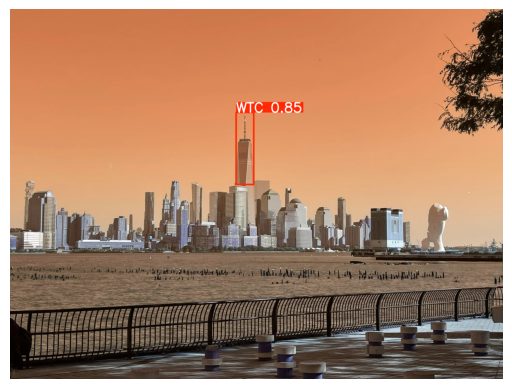

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Test inference on trained weights

# testing_model = YOLO("./models/custom/fp16/wtc_finetuned_16.onnx")
testing_model = YOLO("../runs/detect/train/weights/best.pt")
results = testing_model("./test_images/test_inference.webp", half=True, task="segment")
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array)
    plt.imshow(im)
    plt.axis("off")
    plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline
Found 16 detections above 0.01
After NMS: 1 detections


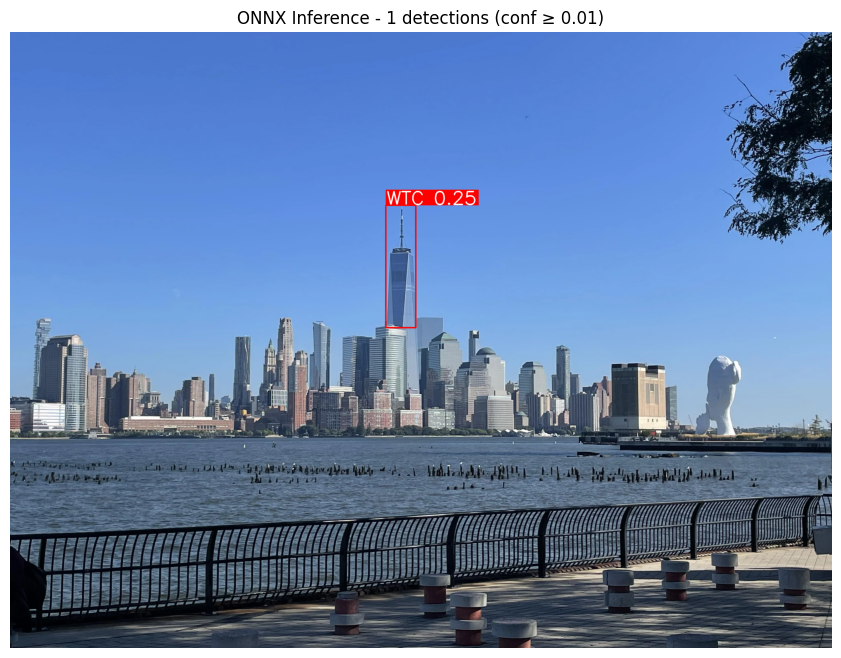

In [ ]:
import onnxruntime as ort
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib

# load onnx model
sess = ort.InferenceSession(
    "./models/custom/fp32/wtc_finetuned_32.onnx",
    providers=["CUDAExecutionProvider"]
)
input_name = sess.get_inputs()[0].name
output_names = [o.name for o in sess.get_outputs()]

# load test image
path = "./test_images/test_inference.webp"
orig = cv2.imread(path)
rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
h0, w0 = rgb.shape[:2]

# letterboxing
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114)):
    shape = img.shape[:2]
    ratio = min(new_shape[0]/shape[0], new_shape[1]/shape[1])
    new_unpad = (int(round(shape[1]*ratio)), int(round(shape[0]*ratio)))
    dw, dh = new_shape[1]-new_unpad[0], new_shape[0]-new_unpad[1]
    dw, dh = dw/2, dh/2
    img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh-0.1)), int(round(dh+0.1))
    left, right = int(round(dw-0.1)), int(round(dw+0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right,
                             cv2.BORDER_CONSTANT, value=color)
    return img, ratio, (dw, dh)

img, ratio, dwdh = letterbox(rgb, (640, 640))
img_input = np.ascontiguousarray(img.transpose(2, 0, 1)[None], dtype=np.float32) / 255.0

# run inference
outputs = sess.run(output_names, {input_name: img_input})
pred, proto = outputs

# parse segmentation results
pred = np.squeeze(pred)
proto = np.squeeze(proto)

boxes = pred[:4, :].T
obj = pred[4:5, :].T
cls_sc = pred[5:6, :].T
mask_coeffs = pred[6:, :].T

scores = (obj * cls_sc).flatten()

# adjust confidence threshold here
conf_thres = 0.01
mask = scores > conf_thres
boxes, scores, mask_coeffs = boxes[mask], scores[mask], mask_coeffs[mask]

print(f"Found {len(boxes)} detections above {conf_thres}")

# Apply simple non-maximum suppression
def nms(boxes, scores, iou_threshold=0.45):
    if len(boxes) <= 1:
        return boxes, scores

    x1 = boxes[:, 0] - boxes[:, 2] / 2
    y1 = boxes[:, 1] - boxes[:, 3] / 2
    x2 = boxes[:, 0] + boxes[:, 2] / 2
    y2 = boxes[:, 1] + boxes[:, 3] / 2
    boxes_xyxy = np.column_stack([x1, y1, x2, y2])

    indices = np.argsort(scores)[::-1]
    keep = []

    while len(indices) > 0:
        current = indices[0]
        keep.append(current)
        if len(indices) == 1:
            break

        current_box = boxes_xyxy[current]
        others = boxes_xyxy[indices[1:]]

        x1_int = np.maximum(current_box[0], others[:, 0])
        y1_int = np.maximum(current_box[1], others[:, 1])
        x2_int = np.minimum(current_box[2], others[:, 2])
        y2_int = np.minimum(current_box[3], others[:, 3])
        inter = np.maximum(0, x2_int - x1_int) * np.maximum(0, y2_int - y1_int)

        area_c = (current_box[2] - current_box[0]) * (current_box[3] - current_box[1])
        area_o = (others[:, 2] - others[:, 0]) * (others[:, 3] - others[:, 1])
        union = area_c + area_o - inter
        iou = inter / np.maximum(union, 1e-6)

        indices = indices[1:][iou <= iou_threshold]

    return boxes[keep], scores[keep]

boxes, scores = nms(boxes, scores)
print(f"After NMS: {len(boxes)} detections")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

obj = sigmoid(pred[4:5, :].T)
cls_sc = sigmoid(pred[5:6, :].T)
mask_coeffs = pred[6:, :].T
scores = (obj * cls_sc).flatten()

# rescale boxes back to original image
def scale_boxes(boxes, ratio, dwdh, orig_shape):
    x1 = boxes[:, 0] - boxes[:, 2] / 2
    y1 = boxes[:, 1] - boxes[:, 3] / 2
    x2 = boxes[:, 0] + boxes[:, 2] / 2
    y2 = boxes[:, 1] + boxes[:, 3] / 2

    x1 = (x1 - dwdh[0]) / ratio
    y1 = (y1 - dwdh[1]) / ratio
    x2 = (x2 - dwdh[0]) / ratio
    y2 = (y2 - dwdh[1]) / ratio

    x1 = np.clip(x1, 0, orig_shape[1])
    y1 = np.clip(y1, 0, orig_shape[0])
    x2 = np.clip(x2, 0, orig_shape[1])
    y2 = np.clip(y2, 0, orig_shape[0])

    return np.column_stack([x1, y1, x2, y2])

boxes = scale_boxes(boxes.copy(), ratio, dwdh, (h0, w0))
scores = scores.flatten()

# draw the overlay
overlay = rgb.copy()
font_scale = 3
font_thickness = 6
box_thickness = 5

for i, (box, sc) in enumerate(zip(boxes, scores)):
    x1, y1, x2, y2 = box.astype(int)
    label = f"WTC {float(sc):.2f}"
    color = (255, 0, 0)

    (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(overlay, (x1, max(y1 - th - 10, 0)), (x1 + tw + 8, y1), color, -1)
    cv2.putText(overlay, label, (x1 + 4, max(y1 - 4, 0)),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)
    cv2.rectangle(overlay, (x1, y1), (x2, y2), color, box_thickness)

# djsplay
plt.figure(figsize=(12, 8))
plt.imshow(overlay)
plt.axis("off")
plt.title(f"ONNX Inference - {len(boxes)} detections (conf ≥ {conf_thres})")
plt.show()
